# Loading Packages

In [1]:
using Pkg
path2CloudClean = "/n/home12/saydjari/finksage/Working/2025_02_09/CloudClean.jl/"
Pkg.activate(path2CloudClean*"/examples/CloudCleanEx")

  Activating new project at `~/finksage/Working/2025_02_09/CloudClean.jl/examples/CloudCleanEx`


In [ ]:
# the first time you run this, it might take ~5 min, but it will be faster in the future
# and for all other julia environments you install (lots of package caching and precompilation)
first_time = false
if first_time
    Pkg.add(url="https://github.com/andrew-saydjari/CloudClean.jl")
    Pkg.add("FITSIO")
    Pkg.add(["CairoMakie","ColorSchemes"])
end

In [4]:
# just bear with it for the first time extra precompilation times (~1-2 min)
using CloudClean, FITSIO, StatsBase

[ Info: Precompiling CloudClean [fe36dd89-bde2-4e71-a372-eae745b047b6] (cache misses: wrong dep version loaded (2), incompatible header (2))
[ Info: Precompiling FITSIO [525bcba6-941b-5504-bd06-fd0dc1a4d2eb] (cache misses: wrong dep version loaded (4), incompatible header (6))


In [5]:
# just bear with it for the first time extra precompilation times (~3-4 min)
using CairoMakie; set_theme!(theme_black()); CairoMakie.disable_mime!("svg", "pdf", "text/html");
using ColorSchemes

[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0] (cache misses: wrong dep version loaded (4), incompatible header (2))


# Synthetic Filament Example

Here we show CloudClean performing well on the difficult example of infilling a filament that is isolated on a flat background, in the presence of noise. It is of note that the infill is correctly anisotropic, in contrast to most kernel methods that make an isotropic assumption.

In [6]:
f = FITS(path2CloudClean*"examples/data/SynthFilaments.fits")
out_image = read(f[1])
close(f)

In [7]:
cenx = 520+59
ceny = 520+59
Np = 33
halfNp = (Np-1)÷2
dv = halfNp
shiftx = 5
bimage = zeros(Bool,size(out_image));
circmask = .!kstar_circle_mask(33,rlim=6^2);
bimage[(cenx+shiftx-dv):(cenx+shiftx+dv),(ceny-dv):(ceny+dv)].=circmask;
out_image[bimage].=0
count(bimage)

113

In [8]:
ndraw0 = 2
widx = 129
x_locs = [cenx]
y_locs = [ceny]
star_stats = proc_discrete(x_locs,y_locs,out_image,bimage,Np=Np,tilex=4,ftype=64,widx=widx,seed=2022,ndraw=ndraw0);

Infilling completed after 1 rounds with final width (widx,widy) = (27,27)
Finished 0 stars in tile (1, 1)
Finished 0 stars in tile (1, 2)
Finished 0 stars in tile (1, 3)
Finished 0 stars in tile (1, 4)
Finished 1 stars in tile (2, 1)
Finished 0 stars in tile (2, 2)
Finished 0 stars in tile (2, 3)
Finished 0 stars in tile (2, 4)
Finished 0 stars in tile (3, 1)
Finished 0 stars in tile (3, 2)
Finished 0 stars in tile (3, 3)
Finished 0 stars in tile (3, 4)
Finished 0 stars in tile (4, 1)
Finished 0 stars in tile (4, 2)
Finished 0 stars in tile (4, 3)
Finished 0 stars in tile (4, 4)


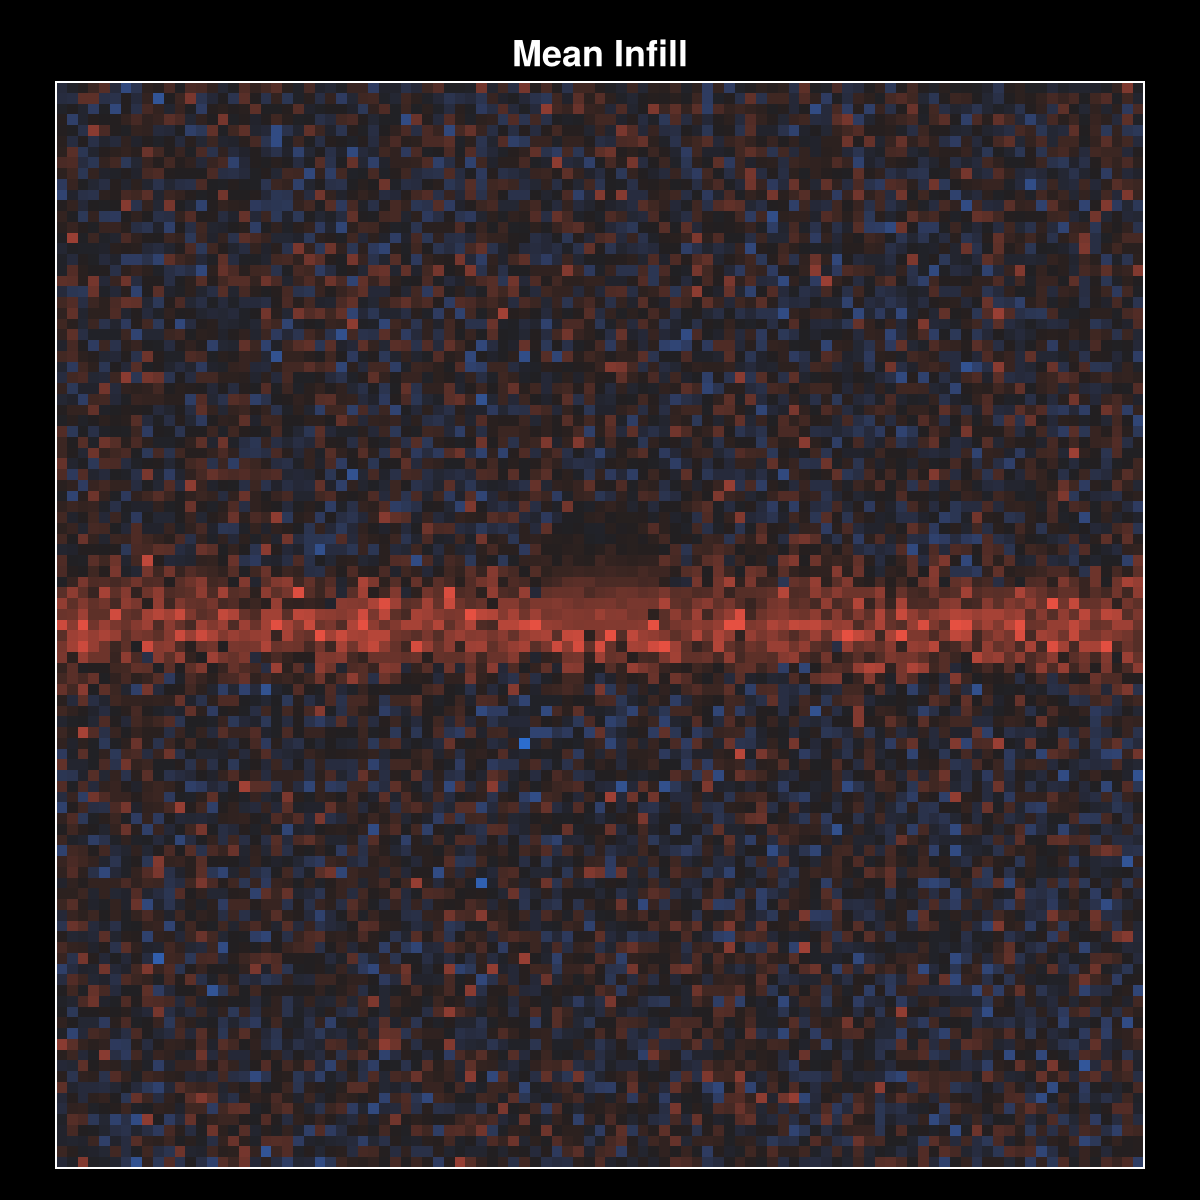

In [9]:
dv = 50
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Mean Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[1][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)]'.-100,
    colormap=:diverging_bkr_55_10_c35_n256,
    colorrange=(-50, 50)
)

resize_to_layout!(fig)
fig

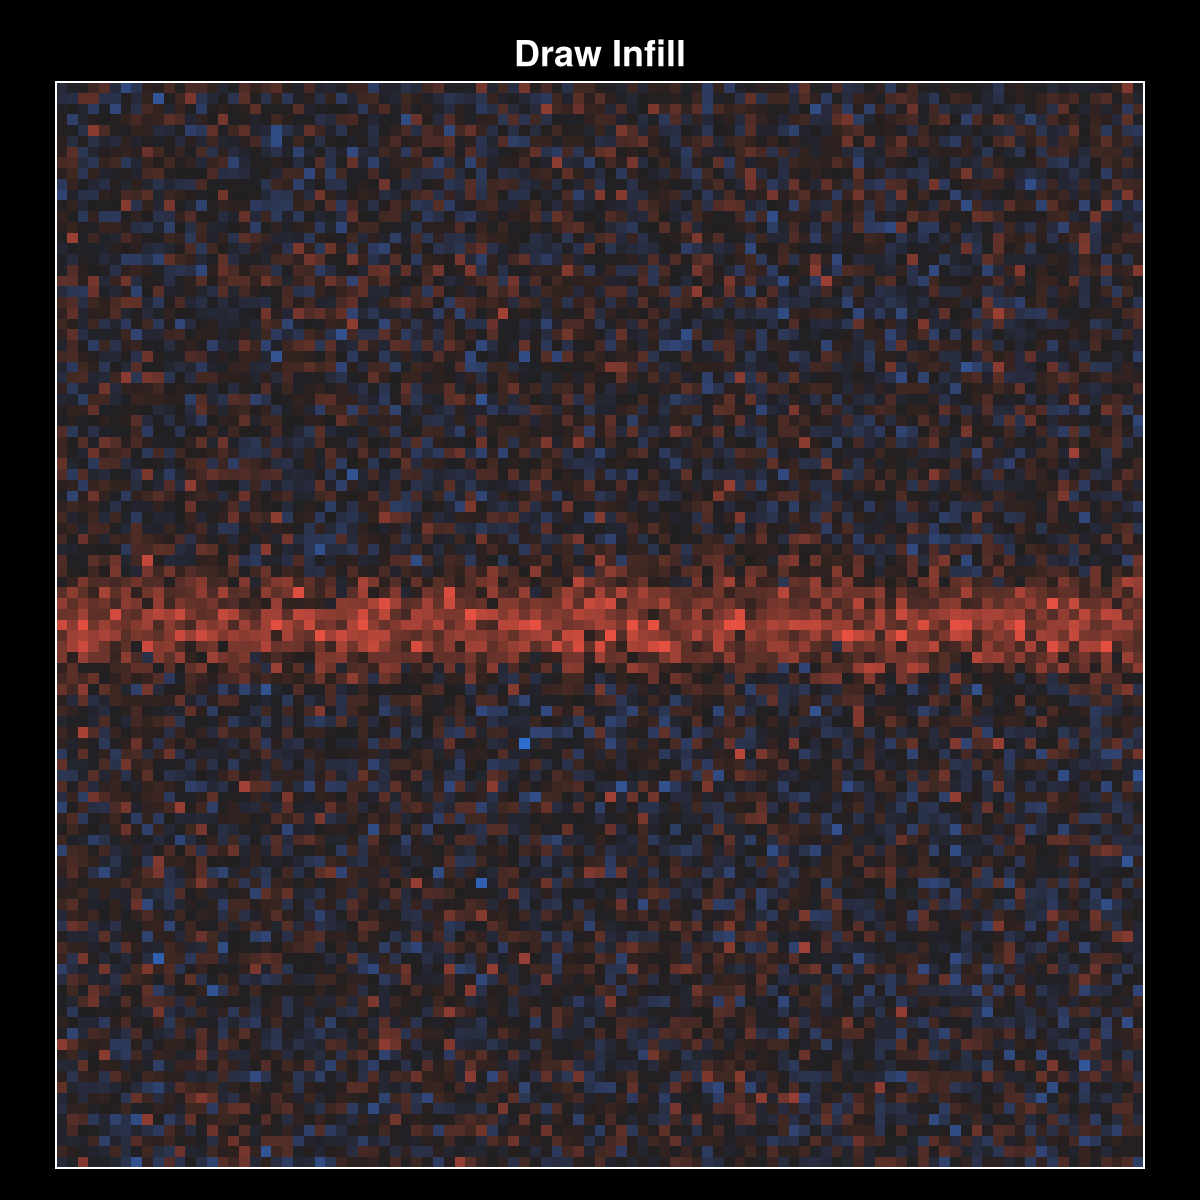

In [10]:
dv = 50
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Draw Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[2][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv),1]'.-100,
    colormap=:diverging_bkr_55_10_c35_n256,
    colorrange=(-50, 50)
)

resize_to_layout!(fig)
fig

# WISE Infilling Example

Example of using proc_continuous to infill an arbitrary masked region of an image. This examples uses a subimage from the WISE 12 um dust map (tile 115).

In [11]:
f = FITS(path2CloudClean*"examples/data/WISE_115sub.fits")
raw_image = read(f[1])
close(f)
out_image = copy(raw_image);

In [12]:
Np = 33
halfNp = (Np-1)÷2
dv = halfNp
shiftx = 5
bimage = zeros(Bool,size(out_image));
circmask = .!kstar_circle_mask(33,rlim=6^2);
cenx = 579
ceny = 579
bimage[(cenx+shiftx-dv):(cenx+shiftx+dv),(ceny-dv):(ceny+dv)].=circmask;
cenx = 550
ceny = 550
bimage[(cenx+shiftx-dv):(cenx+shiftx+dv),(ceny-dv):(ceny+dv)].=circmask;
out_image[bimage].=0
count(bimage)

226

In [13]:
star_stats = proc_continuous(out_image,bimage,Np=Np,tilex=4,ftype=64,widx=widx,seed=2022,ndraw=ndraw0);

Infilling completed after 1 rounds with final width (widx,widy) = (27,27)
Finished 0 of 0 locations in tile (1, 1)
Finished 0 of 0 locations in tile (1, 2)
Finished 0 of 0 locations in tile (1, 3)
Finished 0 of 0 locations in tile (1, 4)
Finished 0 of 0 locations in tile (2, 1)
Finished 0 of 0 locations in tile (2, 2)
Finished 0 of 0 locations in tile (2, 3)
Finished 0 of 0 locations in tile (2, 4)
Finished 0 of 0 locations in tile (3, 1)
Finished 0 of 0 locations in tile (3, 2)
Finished 2 of 226 locations in tile (3, 3)
Finished 0 of 0 locations in tile (3, 4)
Finished 0 of 0 locations in tile (4, 1)
Finished 0 of 0 locations in tile (4, 2)
Finished 0 of 0 locations in tile (4, 3)
Finished 0 of 0 locations in tile (4, 4)


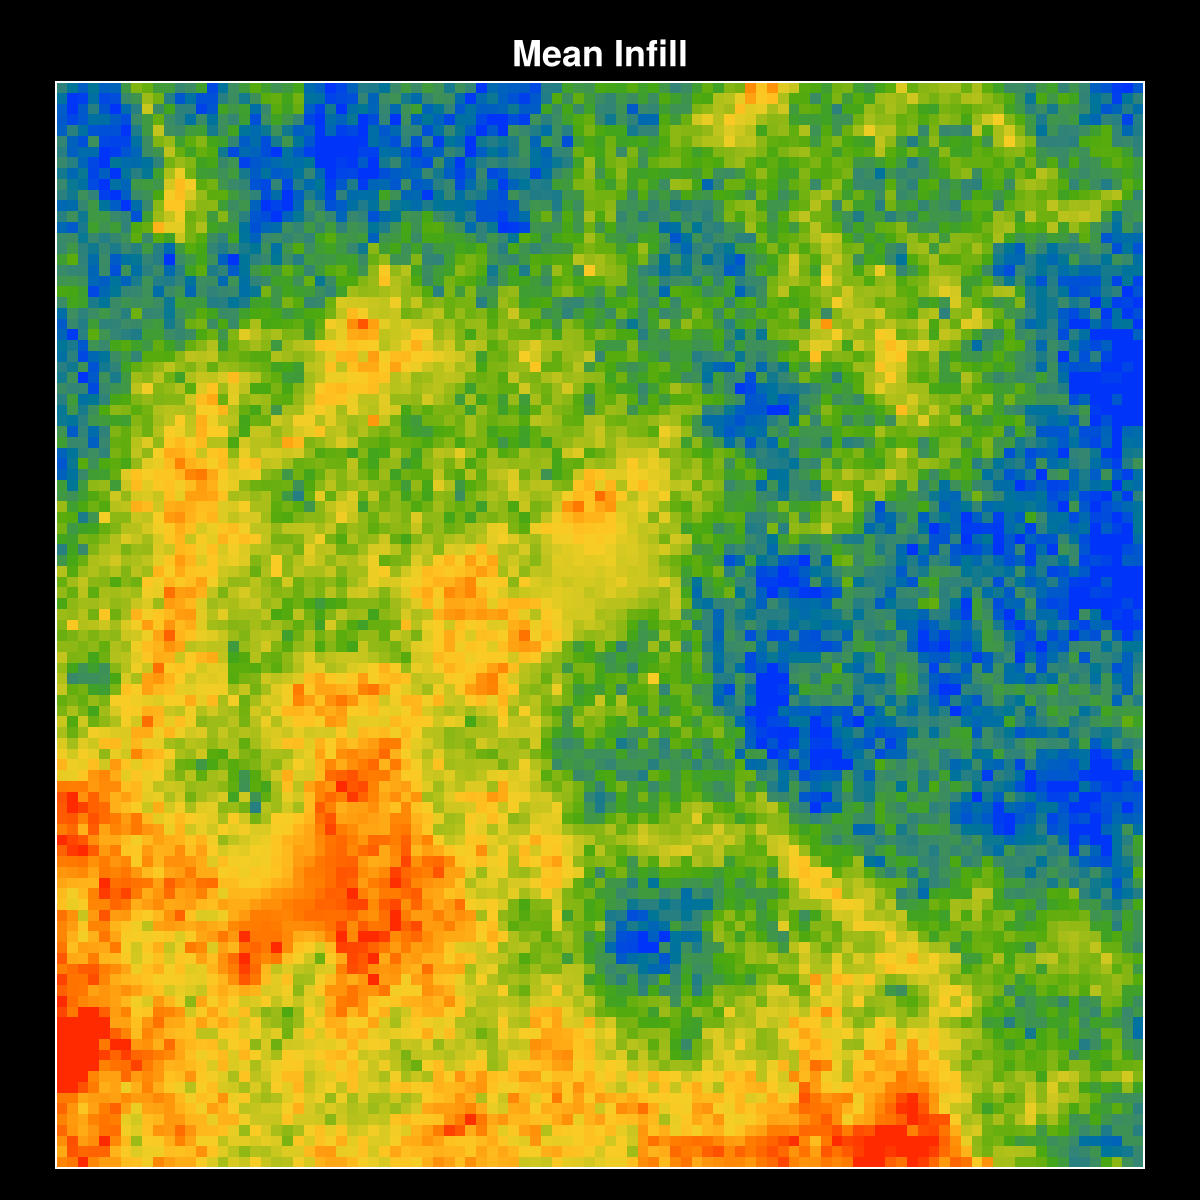

In [17]:
cenx = 579
ceny = 579
dv = 50
vmin, vmax = percentile(raw_image[(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)],[2,99])
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Mean Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[1][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

resize_to_layout!(fig)
fig

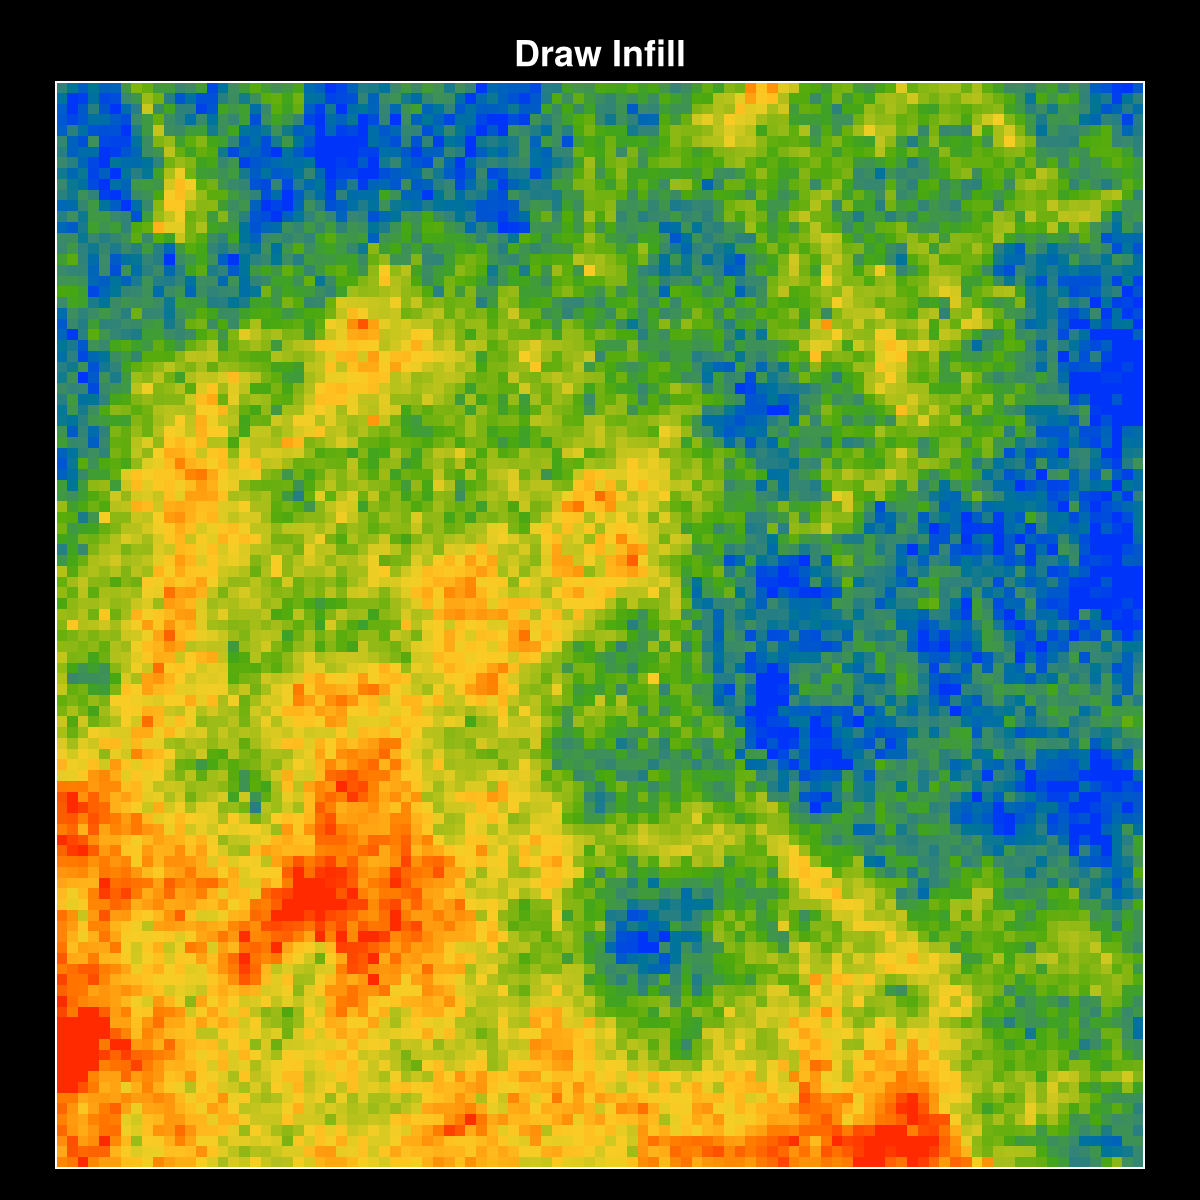

In [18]:
dv = 50
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Draw Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[2][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv),1]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

resize_to_layout!(fig)
fig

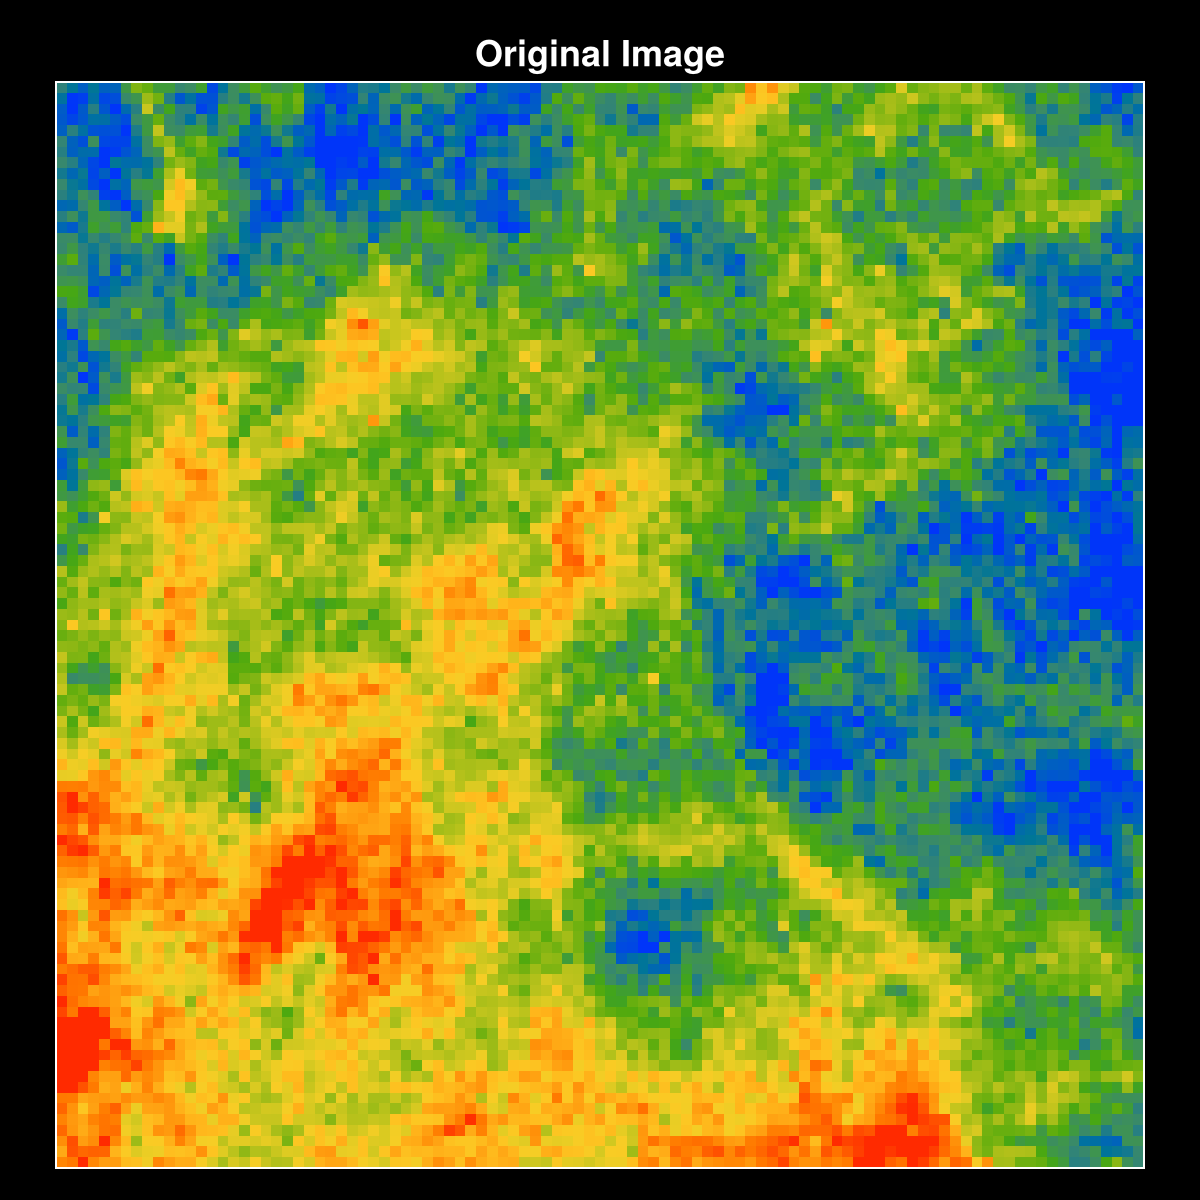

In [19]:
dv = 50
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Original Image", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,raw_image[(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

resize_to_layout!(fig)
fig